# **ERIK SANTANA MONTELONGO**

# **IMPORTS Y DATAFRAMES**

IMPORTS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

ARCHIVOS

In [2]:
# Archivos a dataframes
players = pd.read_csv('/content/Players.csv')
teams = pd.read_csv('/content/Teams.csv')

INVESTIGACION DE PRUEBA

In [3]:
# Top 5 filas de jugadores
print('Top 5 Filas de Jugadores\n')
players.head()

Top 5 Filas de Jugadores



,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"


In [4]:
print('Top 5 rows of Teams data\n')
teams.head()

Top 5 rows of Teams data



,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,"$561,500"
1,2,Acend,5,1,1,1,"$498,859"
2,3,Gambit Esports,8,3,0,1,"$495,638"
3,4,Team Liquid,4,2,2,0,"$295,374"
4,5,G2 Esports,7,2,1,0,"$257,925"


# **PROCESAMIENTO DE DATOS Y PRUEBAS**

In [5]:
# Data shape
print(f'Players data shape: {players.shape}')
print(f'Teams data shape: {teams.shape}')

Players data shape: (500, 7)
Teams data shape: (402, 7)


DATA TYPES (PLAYERS Y TEAMS)

In [6]:
# Data Types
players.dtypes

,0
Rank,int64
Player,object
Gold,int64
Silver,int64
Bronze,int64
S Tier,int64
Earnings,object


In [7]:
teams.dtypes

,0
Rank,int64
Team,object
Gold,int64
Silver,int64
Bronze,int64
S Tier,int64
Earnings,object


CONVERSIONES

In [8]:
# Transformar el $ a un espacio en blanco para la conversion a numerico de los earnings
players['Earnings'] = players['Earnings'].str.replace('$','').str.replace(',','')
teams['Earnings'] = teams['Earnings'].str.replace('$','').str.replace(',','')

In [9]:
# Conversion de los Earnings a numerico
players['Earnings'] = pd.to_numeric(players['Earnings'])
teams['Earnings'] = pd.to_numeric(teams['Earnings'])

if players['Earnings'].dtype in ['int64','float64']:
    print('Hecho')
else:
    print('Prueba otra vez')

Hecho


In [10]:
# Estadisticas rapidas de los datos de los jugadores
players.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,500.0,NaN,NaN,NaN,250.424,144.452002,1.0,125.75,250.5,375.25,500.0
Player,500,499,k1Ng,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gold,500.0,NaN,NaN,NaN,6.912,4.755364,0.0,3.0,6.0,9.0,26.0
Silver,500.0,NaN,NaN,NaN,4.054,2.576113,0.0,2.0,4.0,6.0,13.0
Bronze,500.0,NaN,NaN,NaN,1.666,1.461066,0.0,1.0,1.0,2.0,8.0
S Tier,500.0,NaN,NaN,NaN,0.03,0.170758,0.0,0.0,0.0,0.0,1.0
Earnings,500.0,NaN,NaN,NaN,17646.662,19277.866853,5530.0,7272.75,10723.0,18471.75,113550.0


In [11]:
# Estadisticas rapidas de los equipos
teams.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,402.0,NaN,NaN,NaN,201.467662,116.169131,1.0,101.25,201.5,301.75,402.0
Team,402,402,Sentinels,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gold,402.0,NaN,NaN,NaN,2.940299,3.296854,0.0,1.0,2.0,4.0,19.0
Silver,402.0,NaN,NaN,NaN,2.069652,1.910758,0.0,1.0,2.0,3.0,11.0
Bronze,402.0,NaN,NaN,NaN,0.89801,1.148368,0.0,0.0,1.0,1.0,7.0
S Tier,402.0,NaN,NaN,NaN,0.007463,0.086171,0.0,0.0,0.0,0.0,1.0
Earnings,402.0,NaN,NaN,NaN,26015.733831,57832.080856,92.0,3909.5,8814.0,22486.25,561500.0


# **GRAFICOS**

In [12]:
# Calculo del total de medallas de los jugadores
players['medals_total'] = players['Gold'] + players['Silver'] + players['Bronze']

In [13]:
# Lista de los datos
col_viz = ['medals_total','Gold','Silver','Bronze','Earnings']

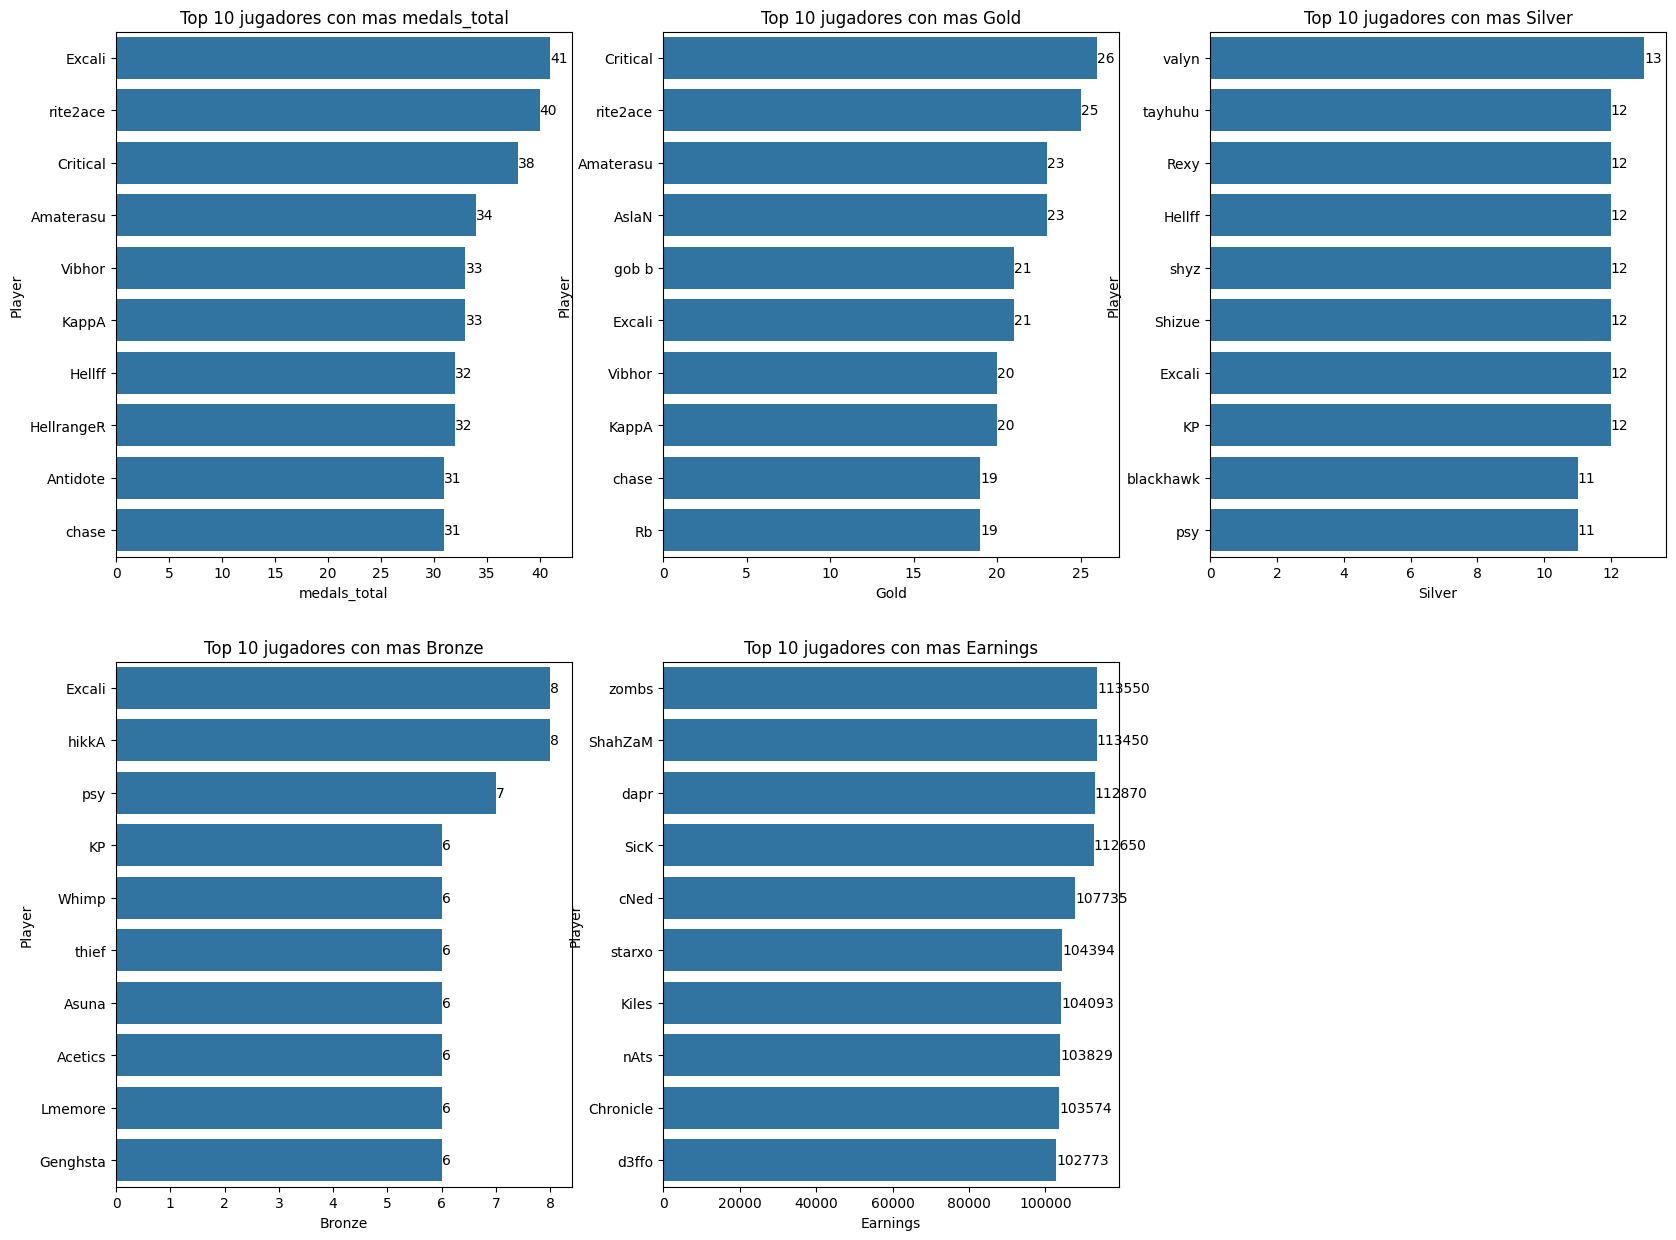

In [14]:
# Top 10 en cada medalla y ganancias (earnings)
plt.figure(figsize=(20,15))
for i,col in enumerate(col_viz):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=players.sort_values(by=col,ascending=False).head(10),x = col,y='Player')
    ax.bar_label(ax.containers[0])
    plt.title(f'Top 10 jugadores con mas {col}')
plt.show()

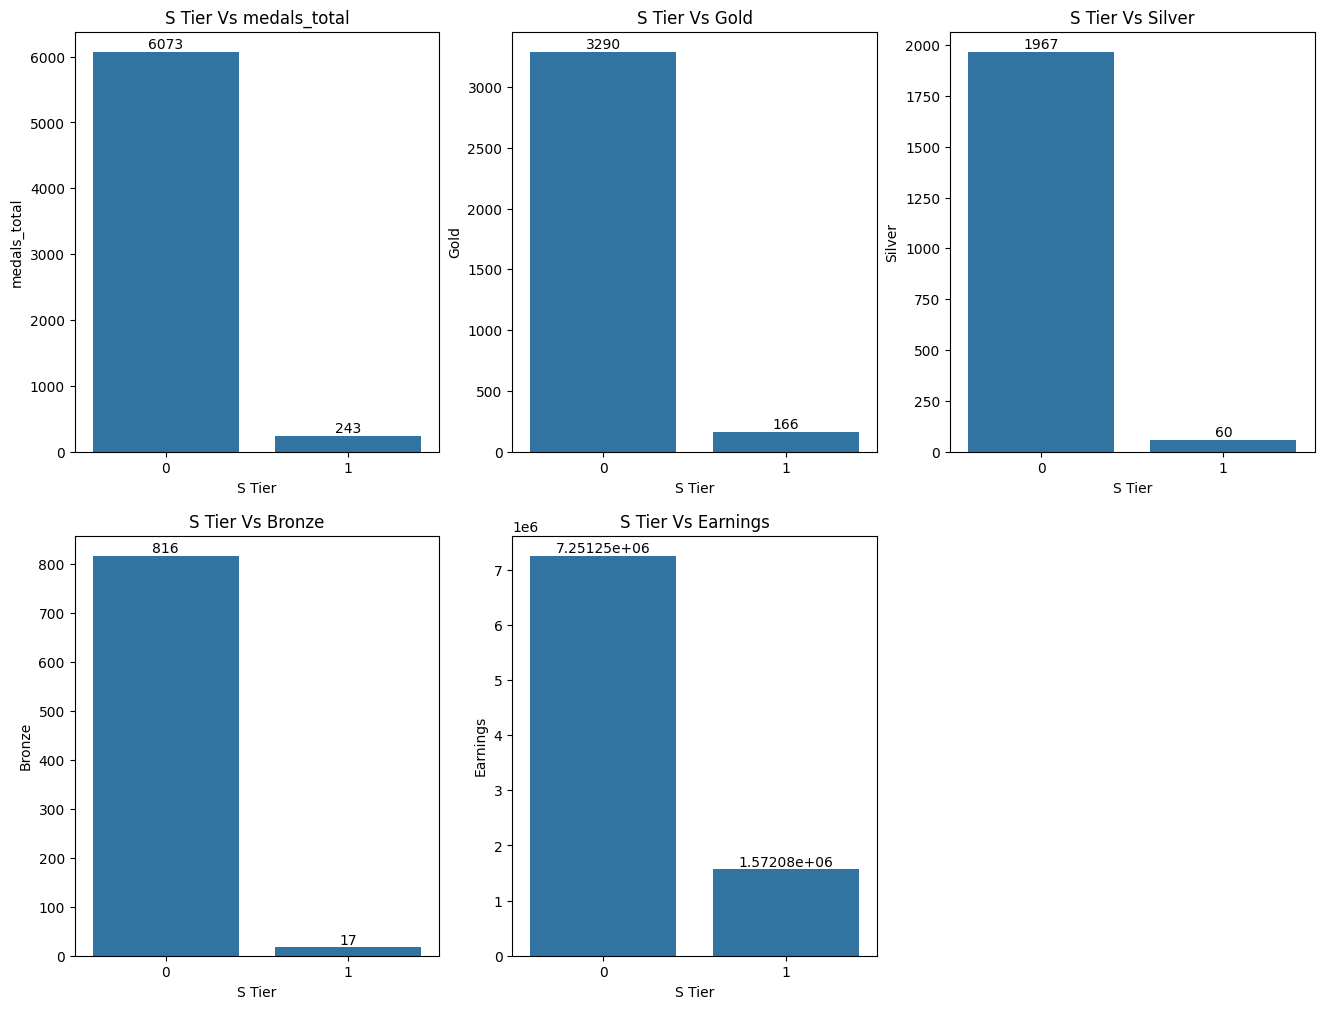

In [15]:
# Agrupacion basada en "S Tier"
group_players_s = players.groupby('S Tier').sum().reset_index()

plt.figure(figsize=(16,12))
for i,col in enumerate(col_viz):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=group_players_s,x='S Tier',y=col)
    ax.bar_label(ax.containers[0])
    plt.title(f'S Tier Vs {col}')
plt.show()

# **HEATMAP DE CORRELACION**

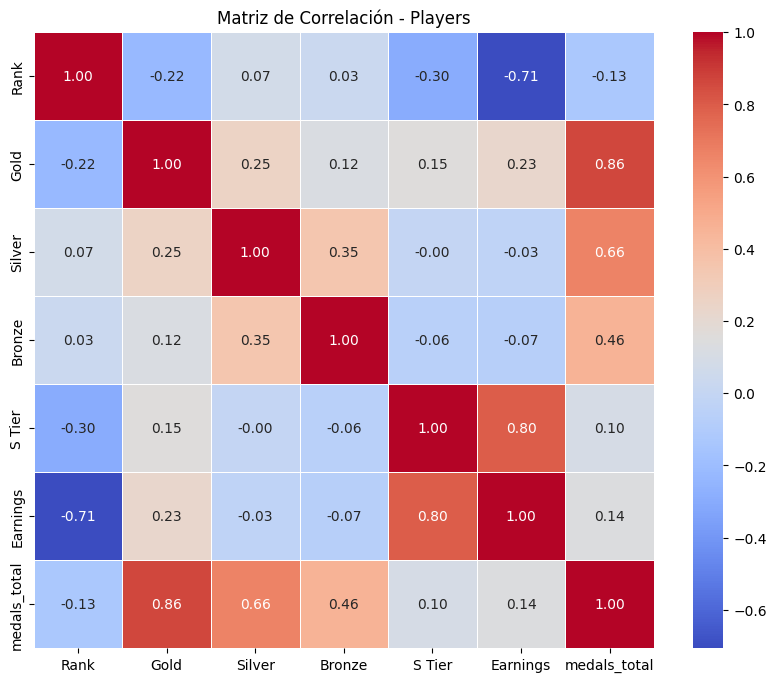

In [20]:
# Seleccionar solo columnas numericas (quitamos "Player")
numeric_cols = players.drop(columns=["Player"])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Players")
plt.show()

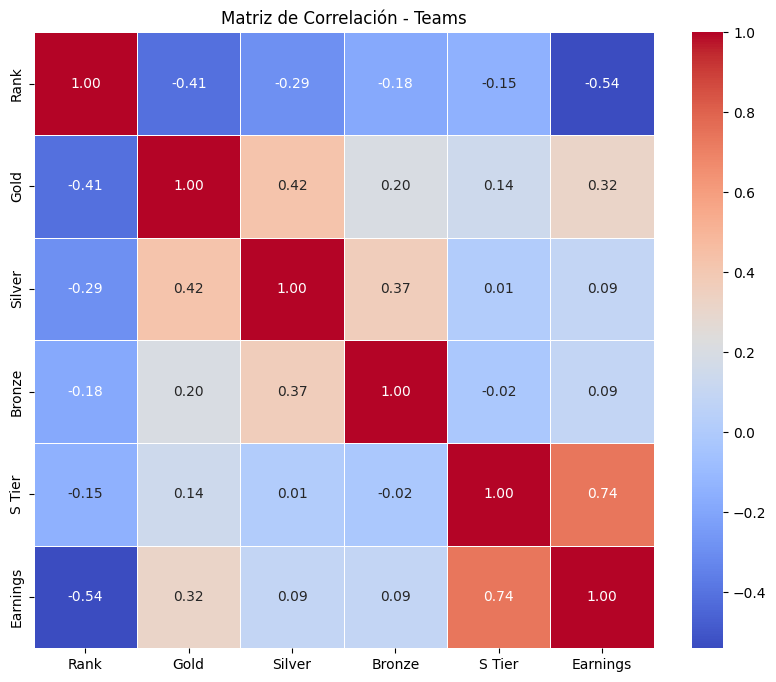

In [21]:
# Seleccionar solo columnas numericas (quitamos "Team")
numerics_cols = teams.drop(columns=["Team"])

plt.figure(figsize=(10, 8))
sns.heatmap(numerics_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Teams")
plt.show()

# **MATRIZ DE GRAFICO DE DISPERSION**

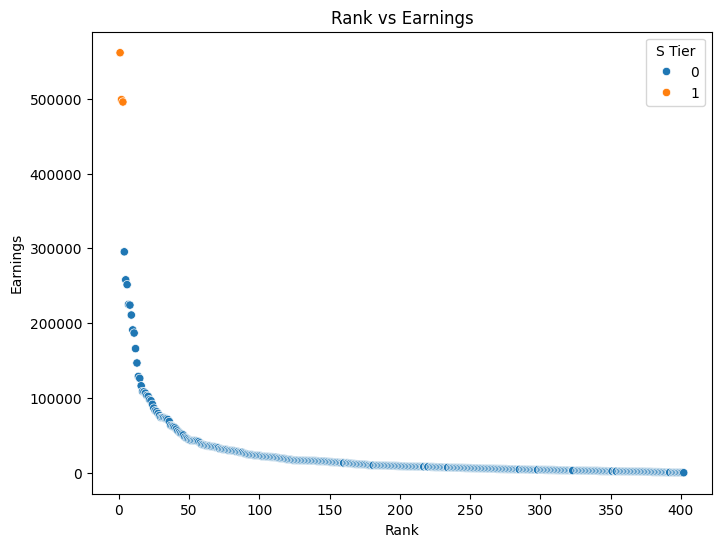

In [22]:
# Relacion de los equipos entre su rango y sus ganancias
plt.figure(figsize=(8,6))
sns.scatterplot(data=teams,x='Rank', y='Earnings', hue='S Tier')
plt.title('Rank vs Earnings')
plt.show()

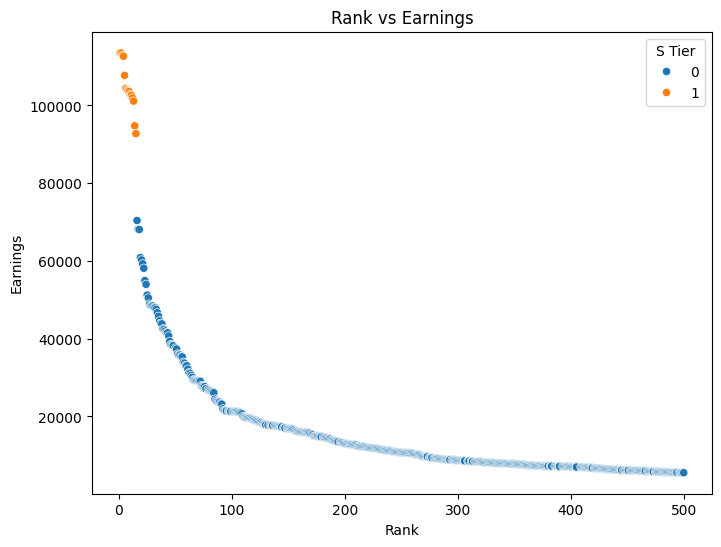

In [23]:
# Relacion de los jugadores entre su rango y sus ganancias
plt.figure(figsize=(8,6))
sns.scatterplot(data=players,x='Rank', y='Earnings', hue='S Tier')
plt.title('Rank vs Earnings')
plt.show()

# **SELECTKBEST**

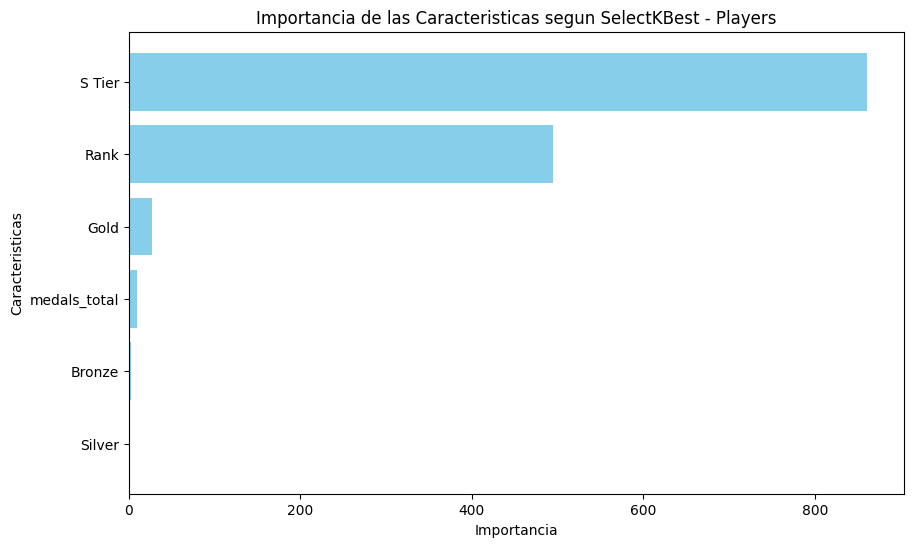

In [24]:
from sklearn.feature_selection import SelectKBest, f_regression

X = players.drop(columns=["Player", "Earnings"])  # Quitar "Player" y "Earnings" de los datos
y = players["Earnings"]

selector = SelectKBest(score_func=f_regression, k="all")  # Evaluacion de los datos
selector.fit(X, y)

# Puntajes de cada dato
scores = selector.scores_

# DataFrame con los resultados
feature_scores = pd.DataFrame({"Feature": X.columns, "Score": scores})
feature_scores = feature_scores.sort_values(by="Score", ascending=False)  # Ordenar por importancia


plt.figure(figsize=(10, 6))
plt.barh(feature_scores["Feature"], feature_scores["Score"], color="skyblue")
plt.xlabel("Importancia")
plt.ylabel("Caracteristicas")
plt.title("Importancia de las Caracteristicas segun SelectKBest - Players")
plt.gca().invert_yaxis() # Para que muestre lo mejor arriba
plt.show()

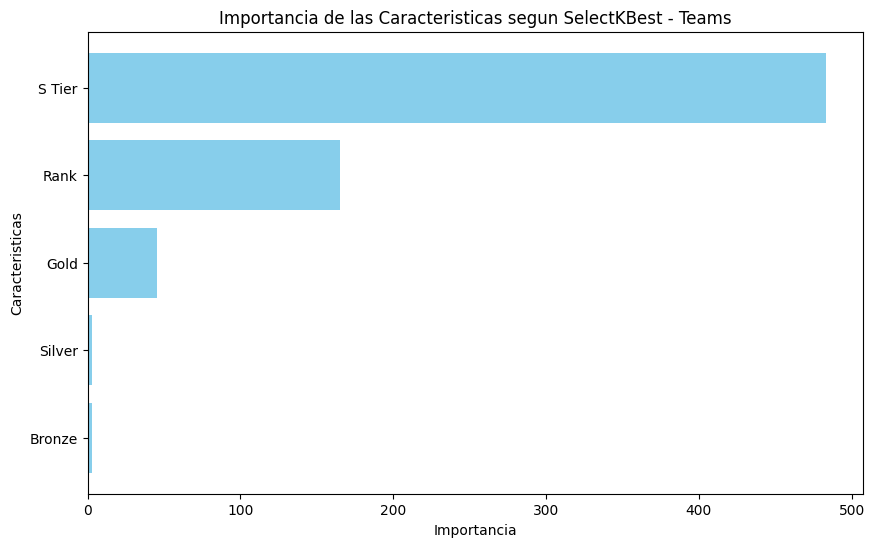

In [25]:
X = teams.drop(columns=["Team", "Earnings"])  # Quitar "Team"  y "Earnings"
y = teams["Earnings"]

selector = SelectKBest(score_func=f_regression, k="all")  # Evaluar todas las características
selector.fit(X, y)

# Puntajes de cada dato
scores = selector.scores_

# DataFrame con los resultados
feature_scores = pd.DataFrame({"Feature": X.columns, "Score": scores})
feature_scores = feature_scores.sort_values(by="Score", ascending=False)  # Ordenar por importancia

plt.figure(figsize=(10, 6))
plt.barh(feature_scores["Feature"], feature_scores["Score"], color="skyblue")
plt.xlabel("Importancia")
plt.ylabel("Caracteristicas")
plt.title("Importancia de las Caracteristicas segun SelectKBest - Teams")
plt.gca().invert_yaxis()  # Para que muestre lo mejor arriba
plt.show()


# **NAIVE BAYES**

## **GaussianNB**

Precisión: 1.00
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00         4

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



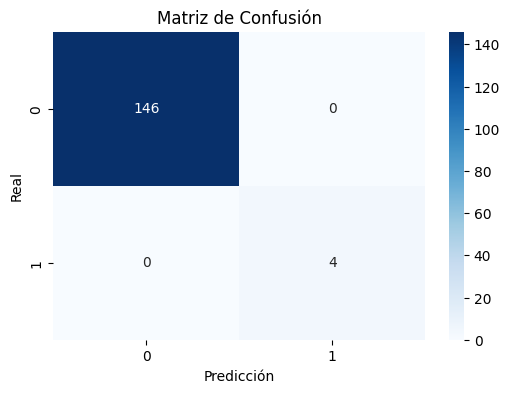

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Seleccionar características numéricas y la variable objetivo
X = players.drop(columns=["Player"])  # Eliminamos la columna categórica "Player"
y = players["S Tier"]  # Tomamos "S Tier" como variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar y entrenar el modelo
model = GaussianNB()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Mostrar resultados
print(f"Precisión: {accuracy:.2f}")
print("Reporte de Clasificación:")
print(report)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## **MultinomialNB**

Precisión: 0.80
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.79      0.89       146
           1       0.12      1.00      0.21         4

    accuracy                           0.80       150
   macro avg       0.56      0.90      0.55       150
weighted avg       0.98      0.80      0.87       150



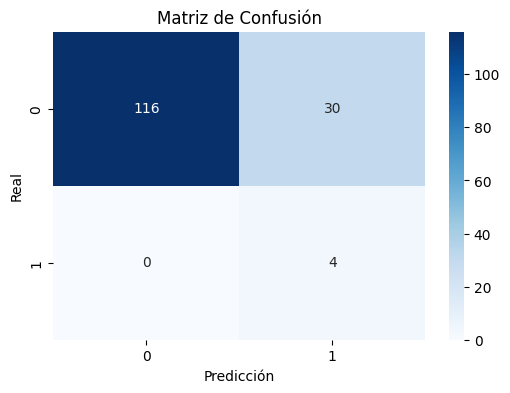

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Seleccionar características numéricas y la variable objetivo
X = players.drop(columns=["Player"])  # Eliminamos la columna categórica "Player"
y = players["S Tier"]  # Tomamos "S Tier" como variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar y entrenar el modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Mostrar resultados
print(f"Precisión: {accuracy:.2f}")
print("Reporte de Clasificación:")
print(report)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## **ComplementNB**

Precisión: 0.80
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.79      0.89       146
           1       0.12      1.00      0.21         4

    accuracy                           0.80       150
   macro avg       0.56      0.90      0.55       150
weighted avg       0.98      0.80      0.87       150



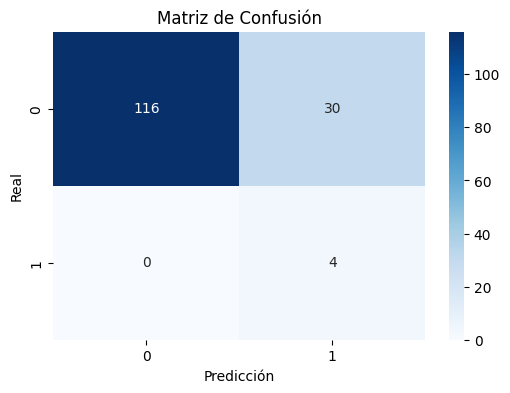

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Seleccionar características numéricas y la variable objetivo
X = players.drop(columns=["Player"])  # Eliminamos la columna categórica "Player"
y = players["S Tier"]  # Tomamos "S Tier" como variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar y entrenar el modelo
model = ComplementNB()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Mostrar resultados
print(f"Precisión: {accuracy:.2f}")
print("Reporte de Clasificación:")
print(report)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## **BernoulliNB**

Precisión: 1.00
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00         4

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



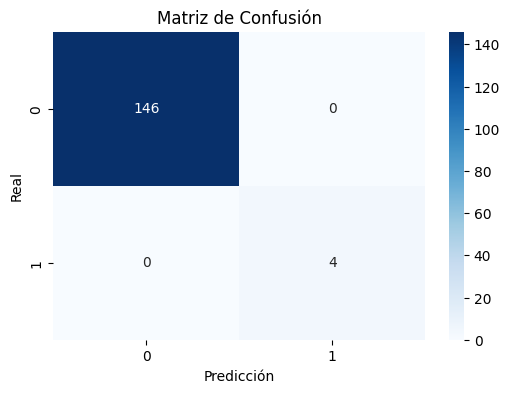

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Seleccionar características numéricas y la variable objetivo
X = players.drop(columns=["Player"])  # Eliminamos la columna categórica "Player"
y = players["S Tier"]  # Tomamos "S Tier" como variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar y entrenar el modelo
model = BernoulliNB()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Mostrar resultados
print(f"Precisión: {accuracy:.2f}")
print("Reporte de Clasificación:")
print(report)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


# **CROSS VALIDATION**

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score

# Seleccionar características numéricas y la variable objetivo
X = players.drop(columns=["Player"])  # Eliminamos la columna categórica "Player"
y = players["S Tier"]  # Tomamos "S Tier" como variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un diccionario de modelos
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
}

# Inicializar un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=["Modelo", "Sin CrossValidation", "Con CrossValidation"])

# Evaluar cada modelo
for model_name, model in models.items():
    # Sin validación cruzada
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_no_cv = accuracy_score(y_test, y_pred)

    # Con validación cruzada (5 folds)
    acc_cv = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

    # Añadir resultados a la tabla
    results = pd.concat([
        results,
        pd.DataFrame({"Modelo": [model_name],
                      "Sin CrossValidation": [acc_no_cv],
                      "Con CrossValidation": [acc_cv]})
    ], ignore_index=True)

# Mostrar la tabla comparativa
print(results)


          Modelo  Sin CrossValidation  Con CrossValidation
0     GaussianNB                  1.0                0.982
1  MultinomialNB                  0.8                0.816
2    BernoulliNB                  1.0                1.000
3   ComplementNB                  0.8                0.814


<ipython-input-59-5cda09fcebd2>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([


GaussianNB:

* Sin validación cruzada: 100% de precisión.
* Validación cruzada: 98.20% de precisión.

La validación cruzada es ligeramente inferior que sin usarla.

MultinomialNB:

* Sin validación cruzada: 80% de precisión.
* Validación cruzada: 81.60% de precisión.

En este caso la validación cruzada nos da un resultado un poquito mejor.

BernoulliNB:

* Sin validación cruzada: 100% de precisión.
* Validación cruzada: 100% de precisión.

Nos da un resultado perfecto, es decir BernoulliNB es el mejor modelo para
este DataSet

ComplementNB:

* Sin validación cruzada: 80% de precisión.
* Validación cruzada: 81.40% de precisión.

Como en el Multinomial, obtenemos un resultado ligeramente mejor usando la validación cruzada